In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

In [4]:
M1 = nn.Linear(2,8,bias=False)
M1

Linear(in_features=2, out_features=8, bias=False)

In [5]:
M1(x)

tensor([[ 3.7926,  3.8685,  0.7674, -0.0110, -4.2722, -2.0866, -0.5825, -1.8796],
        [ 3.3157,  3.4298,  0.7545, -0.1358, -3.7311, -1.6169, -0.6585, -1.3487],
        [ 1.8734,  2.2928,  1.0478, -1.0151, -2.0793,  0.6277, -1.4816,  1.4275],
        [ 6.1315,  6.7794,  2.1602, -1.4060, -6.8643, -1.0931, -2.5833,  0.2007]],
       grad_fn=<MmBackward0>)

In [6]:
M2 = nn.Linear(8,1, bias=False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [9]:
M2(M1(x)).squeeze()

tensor([-2.5010, -2.1655, -1.0677, -3.8128], grad_fn=<SqueezeBackward0>)

In [10]:
y

tensor([1., 5., 2., 5.])

In [11]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
    def forward(self,x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()

In [12]:
f = MyNeuralNet()

In [13]:
yhat = f(x)
yhat

tensor([-1.7257, -1.6573, -2.0412, -4.4245], grad_fn=<SqueezeBackward0>)

In [14]:
y

tensor([1., 5., 2., 5.])

In [15]:
L = nn.MSELoss()
L(y,yhat)

tensor(39.2255, grad_fn=<MseLossBackward0>)

In [16]:
torch.mean((y-yhat)**2)

tensor(39.2255, grad_fn=<MeanBackward0>)

In [17]:
opt = SGD(f.parameters(), lr=0.001)

In [18]:
losses = []
for _ in range(50):
    opt.zero_grad() # flush previous epoch's gradient
    loss_value = L(f(x), y) #compute loss
    loss_value.backward() # compute gradient
    opt.step() # Perform iteration using gradient above
    losses.append(loss_value.item())

Text(0.5, 0, 'Epochs')

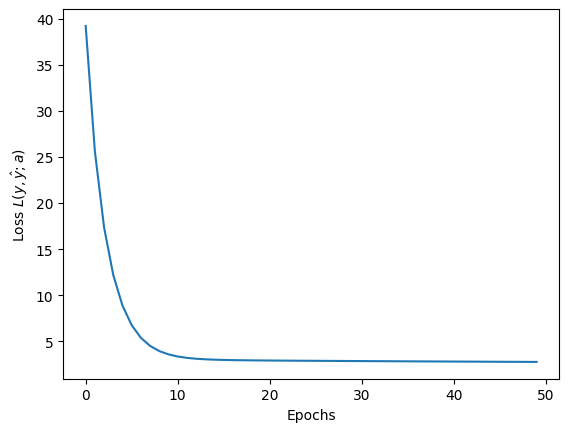

In [19]:
plt.plot(losses)
plt.ylabel('Loss $L(y,\hat{y};a)$')
plt.xlabel('Epochs')

In [20]:
f(x)

tensor([3.4883, 2.9775, 1.1461, 4.8461], grad_fn=<SqueezeBackward0>)

In [21]:
y

tensor([1., 5., 2., 5.])